In [295]:
import nibabel as nib
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
import math

In [425]:
project_dir = '/home/ROBARTS/myousif/projects_inprogress/hippocharts/'
project_data_dir = os.path.join(project_dir,'data')

In [10]:
all_datasets_path = os.path.abspath('/home/ROBARTS/myousif/graham/projects/ctb-akhanf/myousif9/norm_models/datasets/')

datasets_names = ['AOMIC/ds002785','AOMIC/ds002790','AOMIC/ds003097','cam-can','hcp1200','hcp_aging','mpi_leipzig','neurocog_aging','narratives','QTIM']
datasets_path_list = [os.path.join(all_datasets_path,dset) for dset in datasets_names]

datasets_paths = dict(zip(datasets_names,datasets_path_list))

In [24]:
participant_dfs_paths = [ os.path.join(dpath,'bidsdir/participants.tsv') for dpath in datasets_path_list]
participant_dfs_paths[-2] = participant_dfs_paths[-2].replace('/participants.tsv','/ds002345/participants.tsv')
participant_dfs_paths[4] = participant_dfs_paths[4].replace('bidsdir/participants.tsv','unrestricted_myousif_2_8_2024_16_40_50.csv')
participant_dfs_paths[5] = participant_dfs_paths[5].replace('bidsdir/participants.tsv','hcpA_participant_data.csv')

In [25]:
for p in participant_dfs_paths:
    print(p, os.path.exists(p))

/home/ROBARTS/myousif/graham/projects/ctb-akhanf/myousif9/norm_models/datasets/AOMIC/ds002785/bidsdir/participants.tsv True
/home/ROBARTS/myousif/graham/projects/ctb-akhanf/myousif9/norm_models/datasets/AOMIC/ds002790/bidsdir/participants.tsv True
/home/ROBARTS/myousif/graham/projects/ctb-akhanf/myousif9/norm_models/datasets/AOMIC/ds003097/bidsdir/participants.tsv True
/home/ROBARTS/myousif/graham/projects/ctb-akhanf/myousif9/norm_models/datasets/cam-can/bidsdir/participants.tsv True
/home/ROBARTS/myousif/graham/projects/ctb-akhanf/myousif9/norm_models/datasets/hcp1200/unrestricted_myousif_2_8_2024_16_40_50.csv True
/home/ROBARTS/myousif/graham/projects/ctb-akhanf/myousif9/norm_models/datasets/hcp_aging/hcpA_participant_data.csv True
/home/ROBARTS/myousif/graham/projects/ctb-akhanf/myousif9/norm_models/datasets/mpi_leipzig/bidsdir/participants.tsv True
/home/ROBARTS/myousif/graham/projects/ctb-akhanf/myousif9/norm_models/datasets/neurocog_aging/bidsdir/participants.tsv True
/home/ROBAR

In [354]:
participant_dfs = [pd.read_csv(p,sep='\t') if '.tsv' in p else pd.read_csv(p) for p in participant_dfs_paths]

In [355]:
datasets_names_list = ['aomic_piop1',
                       'aomic_piop2',
                       'aomic_id1000',
                       'cam-can',
                       'hcp1200',
                       'hcp_aging',
                       'mpi_leipzig',
                       'neurocog_aging',
                       'narratives',
                       'qtim']

for idx, dset_name in enumerate(datasets_names_list):
    participant_dfs[idx]['dataset'] = dset_name

In [356]:
for i in range(0,4):
    participant_dfs[i]['site'] = datasets_names_list[i]
    
participant_dfs[4]['site'] = participant_dfs[4]['Acquisition']
participant_dfs[6]['site'] = participant_dfs[6]['dataset']
participant_dfs[7]['site'] = participant_dfs[7].site.astype(str).str.replace('1','neurocog_aging1').str.replace('2','neurocog_aging2')
participant_dfs[8]['site'] = 'narratives'
participant_dfs[9]['site'] = participant_dfs[9].ses01_T1w_acq.astype(str).str.replace('1','qtim1').str.replace('2','qtim2')

In [357]:
participant_dfs[2].sex = participant_dfs[2].sex.str.replace('female','F').str.replace('male','M')

In [358]:
participant_dfs[3]['sex'] = participant_dfs[3].gender_text.str.replace('FEMALE','F').str.replace('MALE','M')

In [359]:
participant_dfs[4]['participant_id'] = 'sub-' + participant_dfs[4].Subject.astype(str)

In [360]:
participant_dfs[4]['age'] = participant_dfs[4].Age

In [361]:
participant_dfs[4]['sex'] = participant_dfs[4]['Gender']


In [362]:

for age in participant_dfs[4].age.unique():
    age_bool = (participant_dfs[4].age == age)
    
    if age == '36+':
        for idx, bool_idx in enumerate(participant_dfs[4][age_bool].index):
            participant_dfs[4].iloc[bool_idx] = np.nan
        
        break
    else:
        sub_age_range = age.split('-')

        age_low = int(sub_age_range[0])
        age_high = int(sub_age_range[1])

        np.random.seed(0)
        age_arr = np.random.randint(age_low, age_high+1, size=np.sum(age_bool))

        for idx, bool_idx in enumerate(participant_dfs[4][age_bool].index):
            participant_dfs[4].age.iloc[bool_idx] = age_arr[idx]

/tmp/ipykernel_1427542/2366306193.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participant_dfs[4].age.iloc[bool_idx] = age_arr[idx]


In [363]:
participant_dfs[5]['participant_id'] = 'sub-' + participant_dfs[5].src_subject_id.str.replace('HCA','')
participant_dfs[5]['age'] = participant_dfs[5].interview_age

In [364]:
participant_dfs[6]['sex'] = participant_dfs[6].gender

In [366]:
for age in participant_dfs[6]['age (5-year bins)'].unique():
    
    if type(age) == float:
        continue
    else:
        age_bool = (participant_dfs[6]['age (5-year bins)'] == age)

        sub_age_range = age.split('-')

        age_low = int(sub_age_range[0])
        age_high = int(sub_age_range[1])

        np.random.seed(0)
        age_arr = np.random.randint(age_low, age_high+1, size=np.sum(age_bool))

        for idx, bool_idx in enumerate(participant_dfs[6]['age (5-year bins)'][age_bool].index):
            participant_dfs[6]['age (5-year bins)'].iloc[bool_idx] = age_arr[idx]

In [367]:
participant_dfs[6]['age'] = participant_dfs[6]['age (5-year bins)']

In [377]:
participant_dfs[7][participant_dfs[7].age == '89+'].age = np.nan

/tmp/ipykernel_1427542/1375852419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participant_dfs[7][participant_dfs[7].age == '89+'].age = np.nan


In [383]:
participant_dfs[7].age[participant_dfs[7].age == '89+'] = np.nan

/tmp/ipykernel_1427542/399228310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participant_dfs[7].age.iloc[participant_dfs[7].age[participant_dfs[7].age == '89+'].index[0]] = np.nan


In [391]:
participant_dfs[8].age = participant_dfs[8].age.str.split(',').str[0].replace('n/a',np.nan)
participant_dfs[8].sex = participant_dfs[8].sex.str.split(',').str[0]

In [392]:
participant_df_clean = [ dset_df[['participant_id','age','sex','site','dataset']] for dset_df in participant_dfs]

In [393]:
alldset_participant_df = pd.concat(participant_df_clean)

In [422]:
master_participant_dataset = alldset_participant_df.dropna().reset_index(drop=True)

In [427]:
master_participant_dataset.to_csv(os.path.join(project_data_dir,'master_participants_data.csv'))

<AxesSubplot: xlabel='age', ylabel='Count'>

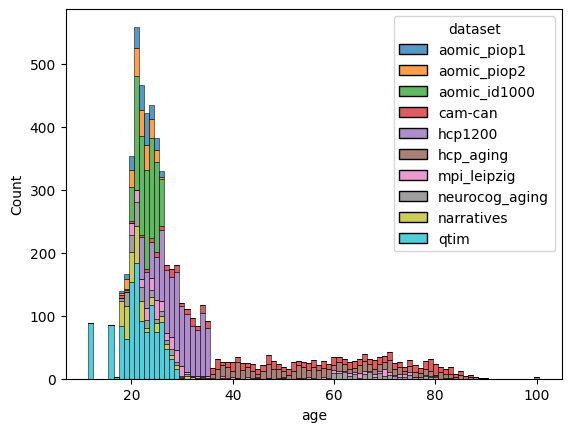

In [429]:
sns.histplot(data=master_participant_dataset,x='age',hue='dataset',multiple='stack')

In [30]:
def glob_metric(hippunfold_dir,den='0p5mm',metric='thickness',label='hipp',ext='.dscalar.nii'):
    paths = glob(os.path.join(hippunfold_dir, f'sub-*/surf/sub-*_space-T1w_den-{den}_label-{label}_{metric}{ext}'))
    if paths == []:
        paths = glob(os.path.join(hippunfold_dir, f'sub-*/ses-*1/surf/sub-*_ses-*1_space-T1w_den-{den}_label-{label}_{metric}{ext}'))

    return paths

In [31]:
def glob_diff(direc, hemi=['L','R'], den='0p5mm',metric='FA'):
    paths = []
    for h in hemi:
        paths.append(glob(os.path.join(direc,f'sub-*/surf/sub-*_hemi-{h}_space-T1w_den-{den}_label-hipp_desc-eddy_{metric}.shape.gii')))
    return paths

In [32]:
def get_hippunfold_metric(dsetpath: os.path.join(path,'derivatives/hippunfold/hippunfold')

SyntaxError: unexpected EOF while parsing (3929744691.py, line 1)